## LOAD DATASET

In [1]:
import pandas as pd
import numpy as np

In [4]:
fake_data = pd.read_csv('../dataset/Fake.csv')
true_data = pd.read_csv('../dataset/True.csv')

In [5]:
fake_data.shape, true_data.shape

((23481, 4), (21417, 4))

In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
def display_news(df):
    for row in df.itertuples(index=True):
        print("Title:", row.title)
        print("Content:", row.text)
        print("Subject:", row.subject)
        print("Date:", row.date)

In [6]:
display_news(fake_data[:5])

Title:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
Content: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s gree

In [7]:
display_news(true_data[:5])

Title: As U.S. budget fight looms, Republicans flip their fiscal script
Content: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional in

In [6]:
print("Number of missing data in fake dataset:", sum(fake_data.isnull().sum()))
print("Number of missing data in true dataset:", sum(true_data.isnull().sum()))

Number of missing data in fake dataset: 0
Number of missing data in true dataset: 0


In [8]:
true_data['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [19]:
fake_data['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [23]:
print("Fake Subjects:\n", fake_data['subject'].value_counts())
print("\nTrue Subjects:\n", true_data['subject'].value_counts())

Fake Subjects:
 subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

True Subjects:
 subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


In [6]:
fake_data = fake_data.drop(columns=['subject'])
true_data = true_data.drop(columns=['subject'])

In [7]:
fake_data['label'] = 0  # Fake news
true_data['label'] = 1  # True news

In [8]:
full_data = pd.concat([fake_data, true_data], ignore_index=True)
full_data.head()

,title,text,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0


In [35]:
full_data.tail()

,title,text,date,text_length,title_length,label
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",2821,61,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",800,52,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",1950,49,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",1199,61,1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,"August 22, 2017",1338,52,1


In [9]:
full_data['title_length'] = full_data['title'].apply(len)
full_data['title_length']

0        79
1        69
2        90
3        78
4        70
         ..
44893    61
44894    52
44895    49
44896    61
44897    52
Name: title_length, Length: 44898, dtype: int64

In [10]:
full_data['text_length'] = full_data['text'].apply(len)
full_data['text_length']

0        2893
1        1898
2        3597
3        2774
4        2346
         ... 
44893    2821
44894     800
44895    1950
44896    1199
44897    1338
Name: text_length, Length: 44898, dtype: int64

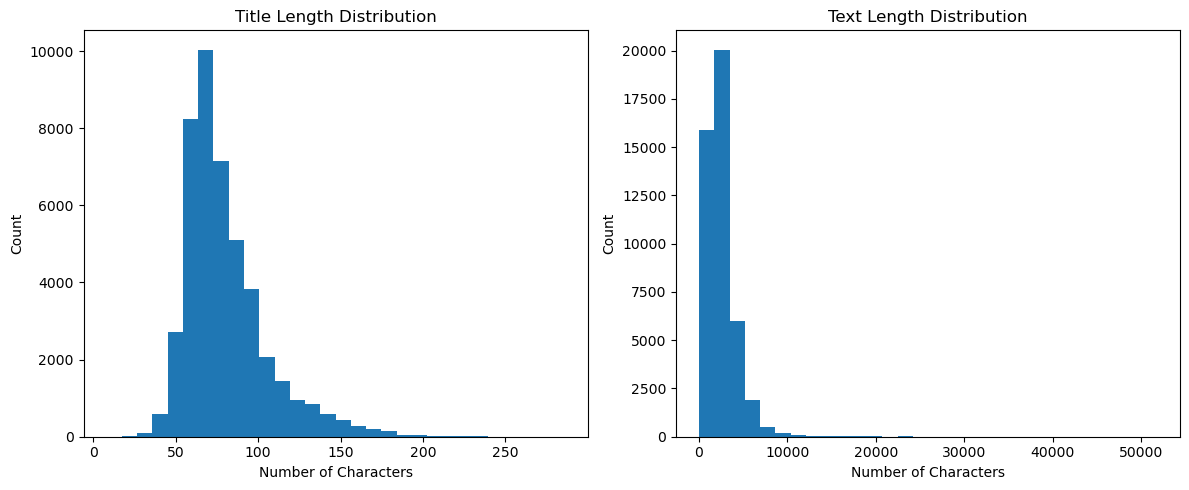

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Histogram for title length
plt.subplot(1, 2, 1)
plt.hist(full_data['title_length'], bins=30)
plt.title('Title Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Count')

# Histogram for text length
plt.subplot(1, 2, 2)
plt.hist(full_data['text_length'], bins=30)
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

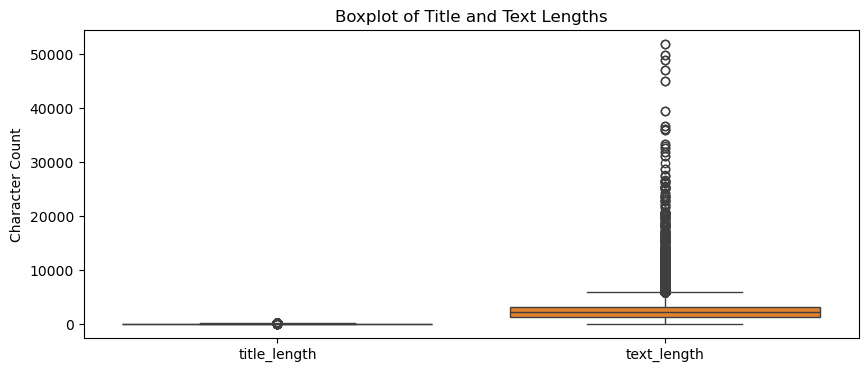

In [31]:
plt.figure(figsize=(10, 4))

# Boxplot for both
sns.boxplot(data=full_data[['title_length', 'text_length']])
plt.title('Boxplot of Title and Text Lengths')
plt.ylabel('Character Count')
plt.show()

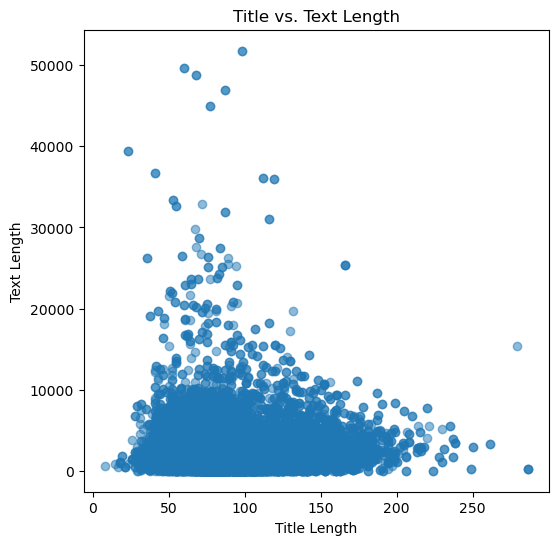

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(full_data['title_length'], full_data['text_length'], alpha=0.5)
plt.title('Title vs. Text Length')
plt.xlabel('Title Length')
plt.ylabel('Text Length')
plt.show()

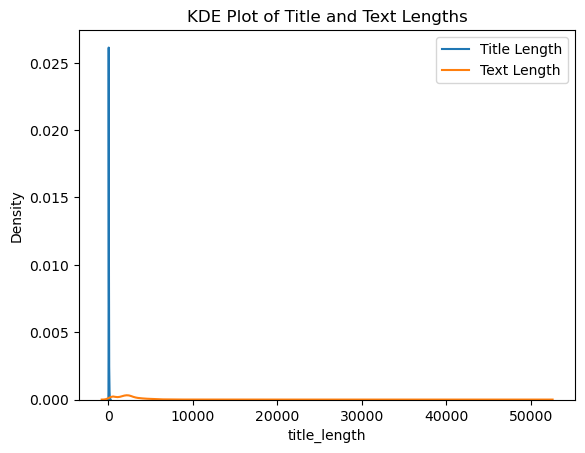

In [33]:
sns.kdeplot(full_data['title_length'], label='Title Length')
sns.kdeplot(full_data['text_length'], label='Text Length')
plt.title('KDE Plot of Title and Text Lengths')
plt.legend()
plt.show()

In [13]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bang\AppData\Roaming\nltk_data...


In [14]:
full_data['clean_text'] = full_data['text'].apply(clean_text)

In [17]:
full_data['clean_title'] = full_data['title'].apply(clean_text)

In [18]:
full_data.head()

,title,text,date,label,title_length,text_length,clean_text,clean_title
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0,79,2893,donald trump wish american happy new year leav...,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0,69,1898,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0,90,3597,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0,78,2774,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0,70,2346,pope francis used annual christmas day message...,pope francis called donald trump christmas speech


In [2]:
full_data = pd.read_csv('../dataset/clean_data.csv')
full_data.head()

,title,text,date,label,title_length,text_length,clean_text,clean_title
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0,79,2893,donald trump wish american happy new year leav...,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0,69,1898,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0,90,3597,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0,78,2774,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0,70,2346,pope francis used annual christmas day message...,pope francis called donald trump christmas speech


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features = 2000,
    ngram_range = (1,2),
    stop_words = 'english'
)

In [4]:
full_data['clean_title'] = full_data['clean_title'].fillna("")
full_data['clean_text'] = full_data['clean_text'].fillna("")
full_data['combine'] = full_data['clean_title'] + " " + full_data['clean_text']
X = full_data['combine']
y= full_data['label']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.9893095768374165
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### That 99% accuracy from a very simple Logistic Regression looks suspiciously high — it’s a sign the dataset is too easy in its current form, likely because of data leakage or strong bias in the text.

In [11]:
X = full_data['combine']
y= full_data['label']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)

In [13]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [14]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.987750556792873
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [16]:
import numpy as np
y_shuffled = np.random.permutation(y_train)
model.fit(X_train, y_shuffled)
print(model.score(X_test, y_test))

0.4873051224944321


In [17]:
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_[0]
top_pos = np.argsort(coefs)[-20:]
top_neg = np.argsort(coefs)[:20]
print("Fake indicators:", feature_names[top_neg])
print("Real indicators:", feature_names[top_pos])

Fake indicators: ['income' 'play' 'lost' 'believe' 'necessary' 'refuse' 'violation'
 'certainly' 'happening' 'chance' 'guard' 'resign' 'goal' 'europe'
 'training' 'shooter' 'television' 'took' 'seriously' 'clear']
Real indicators: ['report' 'welcome' 'coverage' 'chief executive' 'unity' 'closer' 'golf'
 'worry' 'hour' 'security adviser' 'militia' 'serve' 'important'
 'commitment' 'stay' 'appears' 'going' 'abc' 'protecting' 'make sure']


In [18]:
new_model = LogisticRegression(max_iter=1000)
new_model.fit(X_train[:50], y_train[:50])
y_prd = new_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_prd))
print(classification_report(y_test, y_prd))

Accuracy:  0.8792873051224944
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4696
           1       0.86      0.90      0.88      4284

    accuracy                           0.88      8980
   macro avg       0.88      0.88      0.88      8980
weighted avg       0.88      0.88      0.88      8980

